# Evaluación Final Módulo 4
### ANÁLISIS EXPLORATORIO Y PROGRAMACIÓN ESTADÍSTICA.
#### Autor: Nicolás Núñez

### Ejericio 1
La siguiente tabla corresponde a las edades de los niños que
asistieron a un centro de salud.


$$\begin{array}{|c||c||c|}
\hline
\text{Clase} & \text{Edad} & n_i\\
\hline
\hline
\text{Clase 1} & 6 & 20\\
\text{Clase 2} & 7 & 9\\
\text{Clase 3} & 8 & 1\\
\text{Clase 4} & 9 & 7\\
\text{Clase 5} & 10 & 3\\
\hline
\hline

\end{array}$$

1. Determine las medidas de tendencia central: media, mediana,
moda.

In [2]:
import pandas as pd
import numpy as np

# Ingreso de datos
tabla = pd.DataFrame(
    {
        'Edad': range(6,11),
        'Asistencias': [20,9,1,7,3]
    }
)

# Calculo frecuencia acumulada
tabla['Frec acumulada'] = tabla['Asistencias'].cumsum()

# Media
asist = [] # Lista por extension de la edad de los niños asistentes
for i in range(len(tabla)):
    for j in range(tabla['Asistencias'][i]):
        asist.append(tabla['Edad'][i])

media = sum(asist)/len(asist)

# Mediana
mediana = np.median(np.array(asist))

# Moda
moda = tabla[tabla['Asistencias']==max(tabla['Asistencias'])]['Edad']

# Despliegue
print("Las medidas de tendencia central de los datos son")
print(f"\tMedia: {media} años.")
print(f"\tMediana: {mediana} años.")
print(f"\tModa: {moda[0]} años")

Las medidas de tendencia central de los datos son
	Media: 7.1 años.
	Mediana: 6.5 años.
	Moda: 6 años


2. Determine las medidas de dispersión: varianza, desviación
estándar, Coeficiente de variación

In [11]:
# Varianza
varianza = np.var(asist)

# Desviacion estandar
dest = np.std(asist)

# Coef variacion
c_var = (dest/media)

# Despliegue
print('Las medidas de dispersión de los datos son:')
print(f"\tVarianza: {varianza}.")
print(f"\tDesviación estandar: {dest}.")
print(f"\tCoeficiente de variación: {c_var}")

Las medidas de dispersión de los datos son:
	Varianza: 1.89.
	Desviación estandar: 1.374772708486752.
	Coeficiente de variación: 0.19362995894179608


3. Realice un gráfico adecuado a los datos.

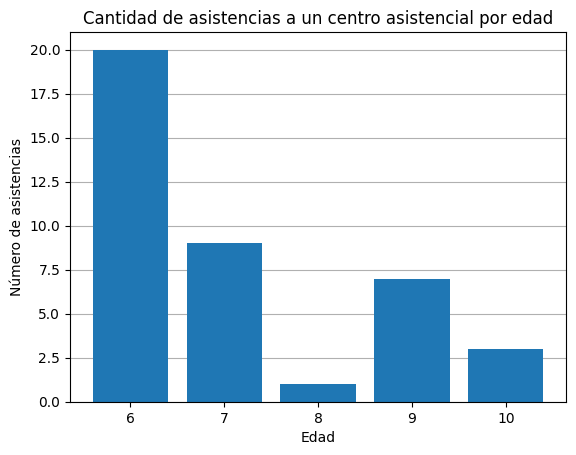

In [4]:
import matplotlib.pyplot as plt

plt.bar(tabla['Edad'], tabla['Asistencias'], zorder=1)
plt.xlabel('Edad')
plt.ylabel('Número de asistencias')
plt.title('Cantidad de asistencias a un centro asistencial por edad')
plt.grid(True, axis='y')
plt.gca().set_axisbelow(True)
plt.show()

### Ejercicio 2
Crear un programa utilizando la librería matplotlib o Seaborn que realice
lo siguiente:

1. Crear el siguiente DataFrame indexado:

$$\begin{array}{ccc}
& \text{calorias} & \text{tiempo}\\
\text{L} & 420 & 60\\
\text{M} & 380 & 40\\
\text{X} & 390 & 75\\
\text{J} & 490 & 55\\
\text{V} & 300 & 45\\
\end{array}$$

In [12]:
from pandas import DataFrame

datos = DataFrame(
    {
        'calorias': [420,380,390,490,300],
        'tiempo': [60,40,75,55,45]
    }
)
datos.index = ["L", "M", "X", "J", "V"]
display(datos)

,calorias,tiempo
L,420,60
M,380,40
X,390,75
J,490,55
V,300,45


2. Calcular la media, mediana, y desviación típica de ambas columnas.

In [6]:
import numpy as np

calorias = {
    'Media': datos['calorias'].mean(),
    'Mediana': datos['calorias'].median(),
    'Desviacion estandar': datos['calorias'].std()
}
tiempo = {
    'Media': datos['tiempo'].mean(),
    'Mediana': datos['tiempo'].median(),
    'Desviacion estandar': datos['tiempo'].std()
}

print("Las estadísticas pedidas para la columna calorias son:")
for key in calorias.keys():
    print(f"\t{key}: {calorias[key]}.")
print()
print("Las estadísticas pedidas para la columna tiempo son:")
for key in tiempo.keys():
    print(f"\t{key}: {tiempo[key]}.")

Las estadísticas pedidas para la columna calorias son:
	Media: 396.0.
	Mediana: 390.0.
	Desviacion estandar: 68.7749954561976.

Las estadísticas pedidas para la columna tiempo son:
	Media: 55.0.
	Mediana: 55.0.
	Desviacion estandar: 13.693063937629153.


3. Añadir otra columna booleana al DataFrame para ver si se ha
cumplido el reto de quemar más de 400 calorías por hora. La nueva
columna debe generarse aplicando una fórmula a las otras columnas.
El DataFrame resultante debe ser el siguiente:

$$\begin{array}{cccc}
& \text{calorias} & \text{tiempo} & \text{reto}\\
\text{L} & 420 & 60 & \text{True}\\
\text{M} & 380 & 40 & \text{True}\\
\text{X} & 390 & 75 & \text{False}\\
\text{J} & 490 & 55 & \text{True}\\
\text{V} & 300 & 45 & \text{False}\\
\end{array}$$

In [7]:
datos['reto'] = ((datos['calorias']/datos['tiempo']) > (400/60))
display(datos)

,calorias,tiempo,reto
L,420,60,True
M,380,40,True
X,390,75,False
J,490,55,True
V,300,45,False


4. Filtrar el DataFrame y devolver otro DataFrame con las filas pares
que cumplan que el número de calorías es mayor de 400.

In [8]:
filtrado = datos[0::2]
filtrado = filtrado[filtrado['reto']]
display(filtrado) # Considerndo la 0-indentacion para considerar los paress

,calorias,tiempo,reto
L,420,60,True


5. Crear a partir del DataFrame una serie con los porcentajes de días
que se ha conseguido el reto y los que no.


In [9]:
serie = datos['reto'].value_counts(normalize=True)
display(serie)

reto
True     0.6
False    0.4
Name: proportion, dtype: float64

6. Crear un gráfico que muestre la progresión de
las calorías y tiempo durante la semana.

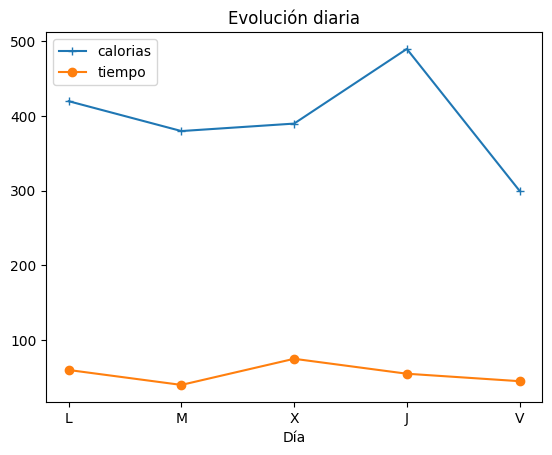

In [10]:
#plt.plot(datos[['calorias','tiempo']], label = ['calorias', 'tiempo'], marker = '+')
plt.plot(datos['calorias'], label = 'calorias', marker = '+')
plt.plot(datos['tiempo'], label = 'tiempo', marker = 'o')
plt.legend()
plt.xlabel('Día')
plt.title('Evolución diaria')
plt.show()